Tiempo de procesamiento: 0.330142 segundos


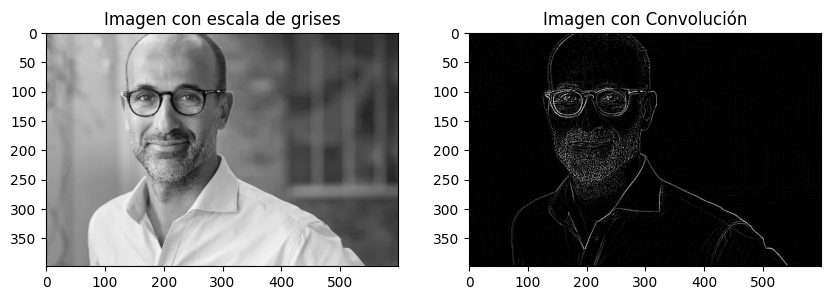

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

# Convierte una imagen en blanco y negro
def change_black_and_white(image):
    return image.convert('L')

# Realiza convoluciones en una imagen para detectar bordes
def convolutions(image):
    start_time = time.time()  # Iniciar temporizador
    width, height = image.size
    output_image = Image.new("RGB", (width, height))
    pixels_input = image.load()
    pixels_output = output_image.load()

    # Kernel para la detección de bordes
    kernel = [
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ]

    # Kernel para mejor enfoque a la imagen
    # kernel = [
    #     [0, -1, 0],
    #     [-1, 5, -1],
    #     [0, -1, 0],
    # ]

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            casilla1 = kernel[0][0] * pixels_input[x - 1, y - 1]
            casilla2 = kernel[0][1] * pixels_input[x, y - 1]
            casilla3 = kernel[0][2] * pixels_input[x + 1, y - 1]

            casilla4 = kernel[1][0] * pixels_input[x - 1, y]
            casilla5 = kernel[1][1] * pixels_input[x, y]
            casilla6 = kernel[1][2] * pixels_input[x + 1, y]

            casilla7 = kernel[2][0] * pixels_input[x - 1, y + 1]
            casilla8 = kernel[2][1] * pixels_input[x, y + 1]
            casilla9 = kernel[2][2] * pixels_input[x + 1, y + 1]

            resultado = (
                casilla1 + casilla2 + casilla3 +
                casilla4 + casilla5 + casilla6 +
                casilla7 + casilla8 + casilla9
            )

            pixels_output[x, y] = (resultado, resultado, resultado)

    end_time = time.time()  # Finalizar temporizador
    execution_time = end_time - start_time  # Calcular tiempo de ejecución
    print("Tiempo de procesamiento: {:.6f} segundos".format(execution_time))
    return output_image

def main():
    # Cargar la imagen
    image = Image.open("persona1.jpg")

    # Convertir la imagen a blanco y negro
    bw_image = change_black_and_white(image)

    # Realizar convoluciones para detectar bordes
    edge_detected_image = convolutions(bw_image)

    # Mostrar las imágenes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(bw_image, cmap='gray')
    axs[0].set_title('Imagen con escala de grises')
    # axs[0].axis('off')

    axs[1].imshow(edge_detected_image)
    axs[1].set_title('Imagen con Convolución')
    # axs[1].axis('off')

    # Guardar la imagen en un archivo
    plt.savefig("resultados_convolucion.png")

    plt.show()

if __name__ == "__main__":
    main()
